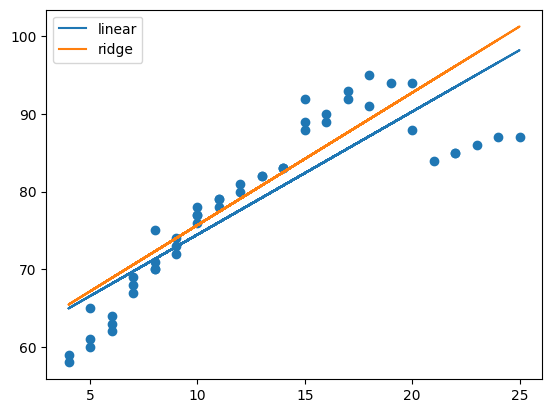

In [6]:
#code for linear regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv("data.csv")
x=data[["Study"]].values
y=data["Time"].values
m=0
num=0
den=0
m2=0
a=200
for i in range(len(x)):
   num+=(x[i]-(np.mean(x)))*(y[i]-(np.mean(y)))
   den+=pow(x[i]-np.mean(x),2)
m=num/den
m2=(num+a)/(den)
b=np.mean(y)-np.mean(x)*m
y_pred=[]
y_rid=[]
for i in range(len(x)):
   y_pred.append(m*x[i]+b)
   y_rid.append(m2*x[i]+b)
plt.scatter(x,y)
plt.plot(x,y_pred,label="linear")
plt.plot(x,y_rid,label="ridge")
plt.legend()


[28.12597332]
-2.2710144261783825
28.159367347119066 -2.3004574196824854


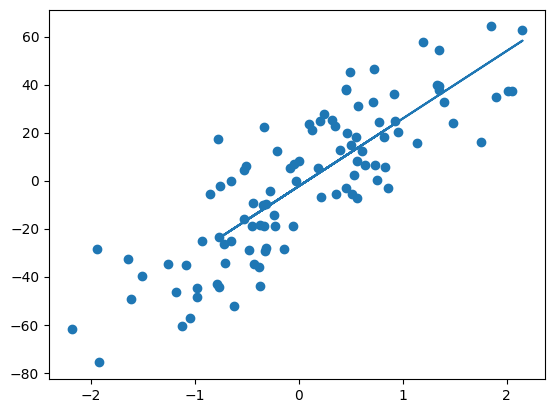

In [16]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    
gd = GDRegressor(0.001,50)
gd.fit(X_train,y_train)

y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
plt.plot(X_test,y_pred)

 

In [ ]:
#  import seaborn as sns
from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(data.data)
# df[0][:]
plt.hist(df[0][:],histtype="bar")
# sns.histplot (x='sepal_length' ,y="sepal_width")
q1=df[0][:].quantile(0.25)
q3=df[0][:].quantile(0.75)
iqr=q3-q1
iqr=q3+(1.5*iqr)
posout=q3+1.5*iqr
negout=q1-1.5*iqr
for i in df[0][:]:
    if i<posout or i<negout:
        print(i)


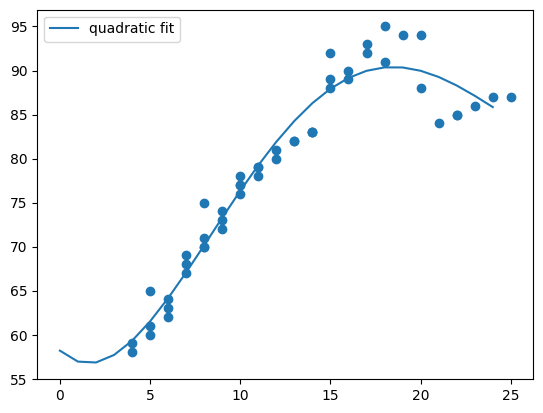

In [18]:
#code for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
data=pd.read_csv("data.csv")
X=data[["Study"]].values
y=data["Time"].values
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=4)#2<=degree<=4 good model.5<degree<20 overfit.degree>20 underfit model  
X_quad = quadratic.fit_transform(X)#we will apply quadratic features to model here we will get x_quad in [1,X,X^2] form. 
X_fit = np.arange(0,25,1)[:, np.newaxis]#here we add a new dimension since we have quadratically transformed our model in [1,X,X^2] form so we will need this dimension for prediction.
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit)) 
y_quad_fit
plt.scatter(X,y)
plt.plot(X_fit, y_quad_fit,
label='quadratic fit')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# <matplotlib.collections.PathCollection at 0x1a9b1984c40>

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)
# C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
#   warnings.warn("The max_iter was reached which means "
LogisticRegression(penalty='none', solver='sag')
print(lor.coef_)
print(lor.intercept_)
# [[4.7808362 0.2062583]]
# [5.7492783]
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        
def sigmoid(z):
    return 1/(1 + np.exp(-z))
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


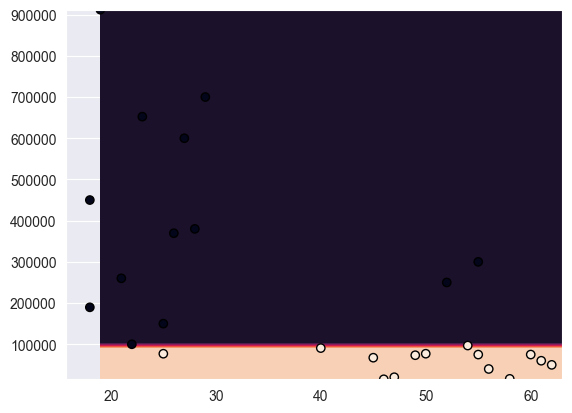

In [58]:
#code for decision tree classifier
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# iris = load_iris()
data=pd.read_csv("insurance_data.csv")
data=np.array(data)
# data

feature_1, feature_2 = np.meshgrid(
    np.linspace(data[:,0].min()+1, data[:,0].max()+1),
    np.linspace(data[:,1].min()+1, data[:,1].max()+1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

tree = DecisionTreeClassifier().fit(data[:,:2], data[:,2])

y_pred = np.reshape(tree.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

display.ax_.scatter(
    data[:,0], data[:,1], c=data[:,2], edgecolor="black")

plt.show()

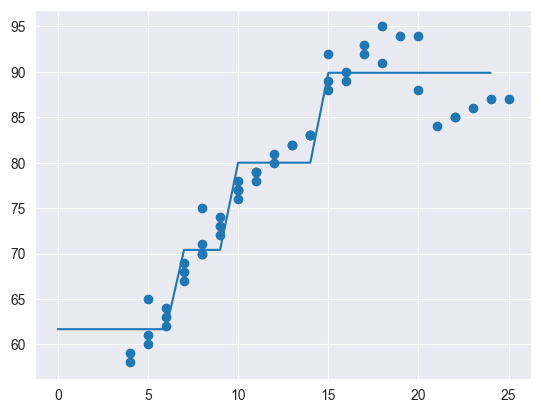

In [59]:
#code for decision tree regreesion
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
# iris = load_iris()
data=pd.read_csv("data.csv")
x=data[["Study"]].values
y=data["Time"].values
xfit=np.arange(0,25)[:,np.newaxis]
dr=DecisionTreeRegressor(max_depth=2)
dr.fit(x[0:25],y[0:25])

ypred=dr.predict(xfit)
plt.scatter(x,y)
plt.plot(xfit,ypred)
plt.show()

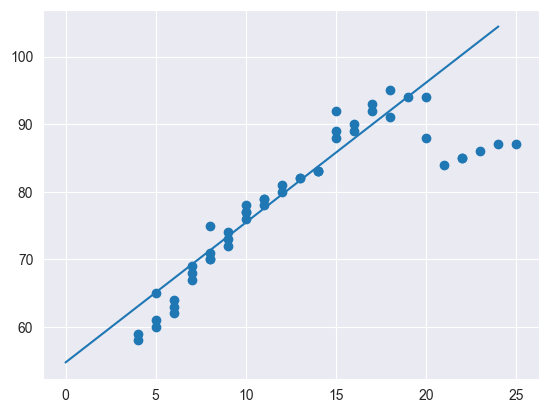

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVR
import pandas as pd
# iris = load_iris()
data=pd.read_csv("data.csv")
x=data[["Study"]].values
y=data["Time"].values
xfit=np.arange(0,25)[:,np.newaxis]
dr=SVR(kernel="linear",gamma=20)
dr.fit(x[0:25],y[0:25])

ypred=dr.predict(xfit)
plt.scatter(x,y)
plt.plot(xfit,ypred)
plt.show()

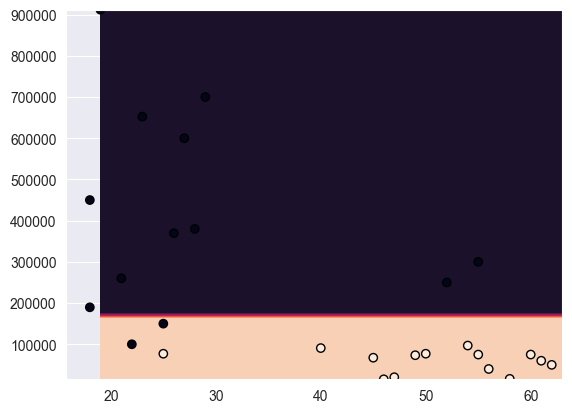

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import pandas as pd
# iris = load_iris()
data=pd.read_csv("insurance_data.csv")
data=np.array(data)
# data

feature_1, feature_2 = np.meshgrid(
    np.linspace(data[:,0].min()+1, data[:,0].max()+1),
    np.linspace(data[:,1].min()+1, data[:,1].max()+1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

tree = SVC().fit(data[:,:2], data[:,2])

y_pred = np.reshape(tree.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

display.ax_.scatter(
    data[:,0], data[:,1], c=data[:,2], edgecolor="black")

plt.show()

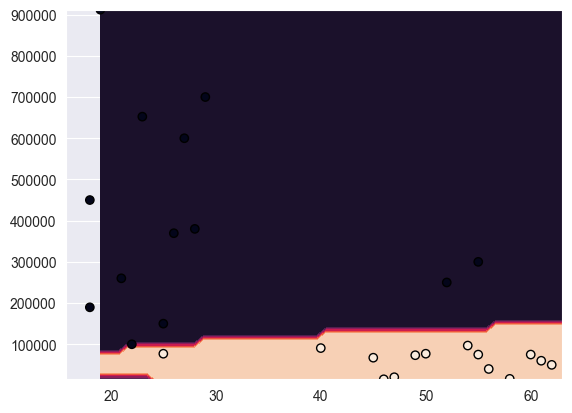

In [62]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
import pandas as pd
# iris = load_iris()
data=pd.read_csv("insurance_data.csv")
data=np.array(data)
# data

feature_1, feature_2 = np.meshgrid(
    np.linspace(data[:,0].min()+1, data[:,0].max()+1),
    np.linspace(data[:,1].min()+1, data[:,1].max()+1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

tree = GaussianNB().fit(data[:,:2], data[:,2])

y_pred = np.reshape(tree.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

display.ax_.scatter(
    data[:,0], data[:,1], c=data[:,2], edgecolor="black")

plt.show()

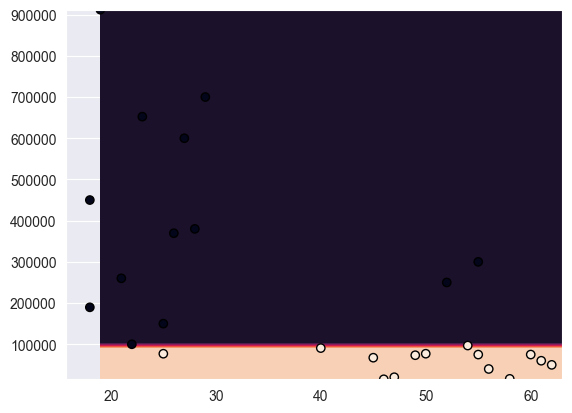

In [63]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
# iris = load_iris()
data=pd.read_csv("insurance_data.csv")
data=np.array(data)
# data

feature_1, feature_2 = np.meshgrid(
    np.linspace(data[:,0].min()+1, data[:,0].max()+1),
    np.linspace(data[:,1].min()+1, data[:,1].max()+1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

tree = KNeighborsClassifier(1).fit(data[:,:2], data[:,2])

y_pred = np.reshape(tree.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

display.ax_.scatter(
    data[:,0], data[:,1], c=data[:,2], edgecolor="black")

plt.show()


In [ ]:
#code for decision tree regreesion
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
# iris = load_iris()
data=pd.read_csv("data.csv")
x=data[["Study"]].values
y=data["Time"].values
xfit=np.arange(0,25)[:,np.newaxis]
dr=KNeighborsRegressor(4)
dr.fit(x[0:25],y[0:25])

ypred=dr.predict(xfit)
plt.scatter(x,y)
plt.plot(xfit,ypred)
plt.show()

In [ ]:
#code for logistic regression
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        
def sigmoid(z):
    return 1/(1 + np.exp(-z))
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
#code for bagging and randomforest
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
     

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()
     


bag = BaggingClassifier(max_features=2)
     

bag.fit(df.iloc[:,:5],df.iloc[:,-1])
     
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=2, max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
     


rf = RandomForestClassifier(max_features=2)
     

rf.fit(df.iloc[:,:5],df.iloc[:,-1])
     
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
df = pd.read_csv('heart.csv')
df.head()
df.shape

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)
{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)
rf_grid.best_params_
{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 20}
rf_grid.best_score_

In [ ]:
#deep learning perceptron
from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
df=pd.read_csv("insurance_data.csv")
df=np.array(df)
features=df[:,:2]
labels=df[:,2]


per=Perceptron()
per.fit(features,labels)

plot_decision_regions(features,labels,clf=per)



